<a href="https://colab.research.google.com/github/tonypacheco223/capstone_AudioProcessing/blob/main/MIDIFileAudioProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install libfmp
!pip install numpy
!pip install librosa
!pip install --upgrade pip

     |████████████████████████████████| 110 kB 6.7 MB/s 
     |████████████████████████████████| 18.5 MB 640 kB/s 
     |████████████████████████████████| 5.6 MB 25.6 MB/s 
     |████████████████████████████████| 793 kB 57.8 MB/s 
     |████████████████████████████████| 381 kB 58.4 MB/s 
     |████████████████████████████████| 51 kB 8.3 MB/s 
  Created wheel for music21: filename=music21-5.7.2-py3-none-any.whl size=22024624 sha256=babce539cd3f52896fe78cd2c63189449912887ce21d661a4729a758a3f89c51
  Stored in directory: /root/.cache/pip/wheels/bc/cb/ae/fd264ebf1e9cf01c15576ee4c128f1bfd907a120c0a7a5b542
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=6e82a6e5ca55d10c215e4458f54e5de2010c663300a746c39bc397cac669f3fc
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667ce39d52100f837835ea18fa
Successfully built music21 pretty-midi
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolki

     |████████████████████████████████| 2.1 MB 7.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [3]:
from libfmp import c1
from mido import MidiFile
import os
import sys
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colors

mid = MidiFile('1mary.mid', clip=True)
#output <midi file '1mary.mid' type 1, 2 tracks, 110 messages>
'''
Three kinds of outputs 
type 0 (single track): all messages are saved in one track
type 1 (synchronous): all tracks start at the same time
type 2 (asynchronous): each track is independent of the others
'''
import pretty_midi
import pandas as pd
import IPython.display as ipd

# sys.path.append('..')
import libfmp 

fn= '1mary.mid'

# fn = os.path.join('..', 'data', 'C1', '1mary.mid')
midi_data = pretty_midi.PrettyMIDI(midi_file= fn)
midi_list = []

print("Nuber of instrument", midi_data.instruments, '\n')
for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])

midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])
html = df.to_html(index=False)
ipd.HTML(html)

''' Print DataFrame '''
print(df)

Fs = 16000
audio_data = midi_data.synthesize(fs=Fs)

#class IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False)¶
ipd.Audio(audio_data, rate=Fs)

Nuber of instrument [Instrument(program=0, is_drum=False, name="Track")] 

        Start        End  Pitch  Velocity Instrument
0    0.000000   0.545454     71       100      Track
1    0.545454   1.090908     69       100      Track
2    1.090908   1.636362     69       100      Track
3    1.636362   2.181816     69       100      Track
4    2.181816   2.727270     71       100      Track
5    2.727270   3.272724     71       100      Track
6    3.272724   4.363632     71       100      Track
7    4.363632   4.909086     69       100      Track
8    4.909086   5.454540     69       100      Track
9    5.454540   6.545448     69       100      Track
10   6.545448   7.090902     71       100      Track
11   7.090902   7.636356     74       100      Track
12   7.636356   8.727264     74       100      Track
13   8.727264   9.272718     71       100      Track
14   9.272718   9.818172     69       100      Track
15   9.818172  10.363626     69       100      Track
16  10.363626  10.909080

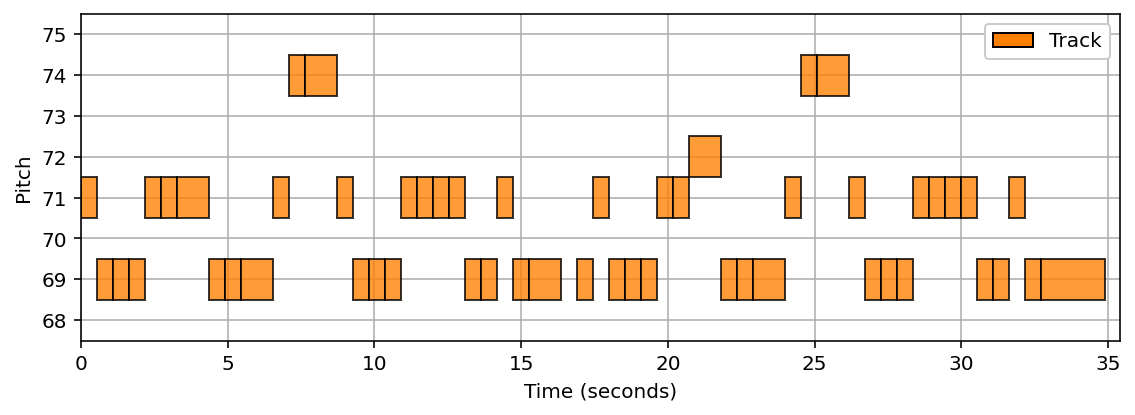

In [4]:
def midi_to_list(midi):
    """Convert a midi file to a list of note events

    Notebook: C1/C1S2_MIDI.ipynb

    Args:
        midi (str or pretty_midi.pretty_midi.PrettyMIDI): Either a path to a midi file or PrettyMIDI object

    Returns:
        score (list): A list of note events where each note is specified as
            ``[start, duration, pitch, velocity, label]``
    """

    if isinstance(midi, str):
        midi_data = pretty_midi.pretty_midi.PrettyMIDI(midi)
    elif isinstance(midi, pretty_midi.pretty_midi.PrettyMIDI):
        midi_data = midi
    else:
        raise RuntimeError('midi must be a path to a midi file or pretty_midi.PrettyMIDI')

    score = []

    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            duration = note.end - start
            pitch = note.pitch
            velocity = note.velocity / 128.
            score.append([start, duration, pitch, velocity, instrument.name])
    return score

score = midi_to_list(midi_data)
libfmp.c1.visualize_piano_roll(score,figsize = (8,3),velocity_alpha = True);
#libfmp.c1.visualize_piano_roll(score, figsize=(8, 3), velocity_alpha=True);

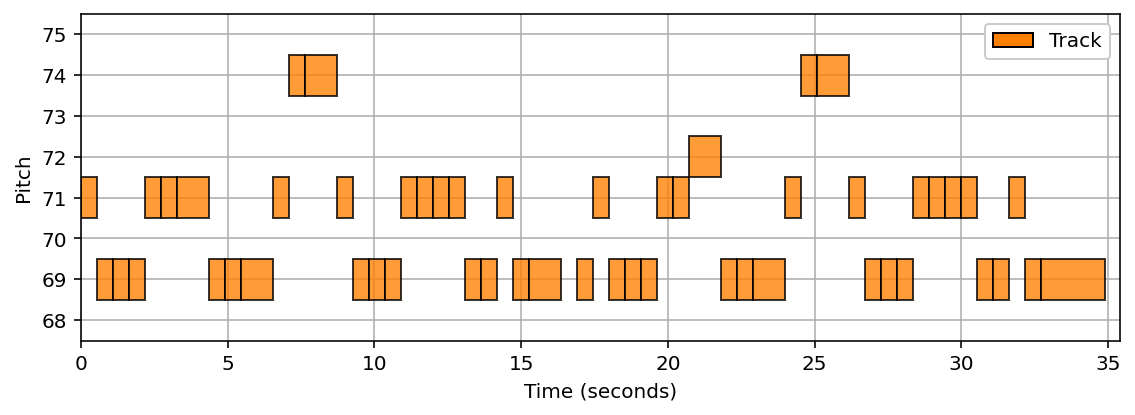

In [5]:
#fn = os.path.join('..', 'data', 'C1', 'FMP_C1_F12_Bach_BWV846_Sibelius-Tracks.mid')
midi_data = pretty_midi.PrettyMIDI(fn)
score = midi_to_list(midi_data)
libfmp.c1.visualize_piano_roll(score, figsize=(8, 3), velocity_alpha=True);